## Trump Model Training

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras import regularizers
import tensorflow as tf


In [2]:
## define paths to data files
path_to_train_data = Path("C:\\Users\\matth\\Documents\\DL4G\\jass-data\\split\\train\\filtered\\card\\csv")
path_to_test_data = Path("C:\\Users\\matth\\Documents\\DL4G\\jass-data\\split\\test\\filtered\\card\\csv")

In [3]:
# train data
data_train1 = pd.read_csv(path_to_train_data / '0001.csv', header=None)
data_train2 = pd.read_csv(path_to_train_data / '0002.csv', header=None)
data_train3 = pd.read_csv(path_to_train_data / '0003.csv', header=None)
data_train4 = pd.read_csv(path_to_train_data / '0004.csv', header=None)

data_train = pd.concat([data_train1, data_train2, data_train3, data_train4], axis=0)
data_train.shape
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,31
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,13
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,32


In [4]:
# test data
data_test1 = pd.read_csv(path_to_test_data / '0001.csv', header=None)
data_test2 = pd.read_csv(path_to_train_data / '0002.csv', header=None)

data_test = pd.concat([data_test1, data_test2])
data_test.shape
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,21
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,12
3,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,3
4,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,8


## Label data for readability

## Prepare x and y values

In [5]:
# colums used for extracting x and y values. The same effect could be achieved with train_test_split-Method, but 
# since we already have different files, we dont need to split the files using this method.
#data_X_columns = cards + forehand
#data_Y_colums = trump

x_train = data_train[data_train.columns[0:81]]
y_train = data_train[data_train.columns[82]]
print (x_train.head())
print (y_train.head())

x_test = data_test[data_test.columns[0:81]]
y_test = data_test[data_test.columns[82]]

   0   1   2   3   4   5   6   7   8   9   ...  71  72  73  74  75  76  77  \
0   0   0   0   0   0   1   0   1   0   0  ...   0   0   1   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   0   0   
2   0   1   0   0   0   0   0   0   1   0  ...   0   0   1   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   1  ...   0   0   1   0   0   1   0   

   78  79  80  
0   0   0   0  
1   0   0   1  
2   1   0   0  
3   0   0   1  
4   0   0   0  

[5 rows x 81 columns]
0    30
1    31
2     8
3    13
4    32
Name: 82, dtype: int64


## Create model and train it

In [6]:
# We have 37 features, so we have a node for each feature. There are 7 output categories: each trump color(4), 
# obe-abe, unde-ufe, schiebe. So we need an reducing function with 7 elements
model = keras.Sequential()
model.add(keras.layers.Dense(81, activation='relu', input_shape=[81]))
model.add(keras.layers.Dense(81, activation='relu'))
model.add(keras.layers.Dense(81, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(81, activation='relu'))
#model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(81, activation='relu'))
model.add(keras.layers.Dense(81, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))

opt = Adam()

model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81)                6642      
_________________________________________________________________
dense_1 (Dense)              (None, 81)                6642      
_________________________________________________________________
dense_2 (Dense)              (None, 81)                6642      
_________________________________________________________________
dense_3 (Dense)              (None, 81)                6642      
_________________________________________________________________
dense_4 (Dense)              (None, 81)                6642      
_________________________________________________________________
dense_5 (Dense)              (None, 81)                6642      
_________________________________________________________________
dense_6 (Dense)              (None, 36)                2

In [7]:
y_train_categorical = to_categorical(y_train)

history = model.fit(x_train, y_train_categorical, epochs=1, batch_size=100)

Train on 383283 samples
383283/383283 [==============================] - 19s 49us/sample - loss: 1.9148 - accuracy: 0.4268


## Generate graphs for loss and accuracy

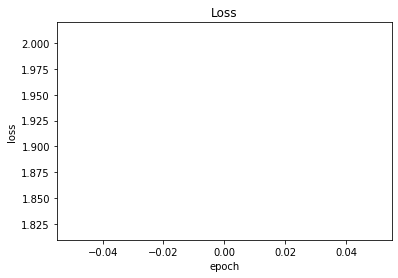

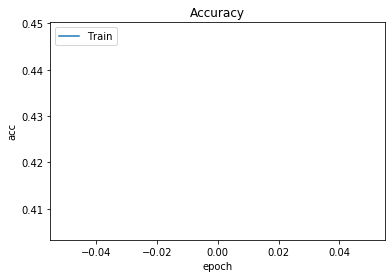

In [8]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train'], loc='upper left')

## Test model

In [9]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

200000/200000 [==============================] - 10s 51us/sample - loss: 1.5403 - accuracy: 0.5056


[1.540347067747116, 0.5056]

In [10]:
model.save("card_model_v3.h5")

In [14]:
print(model.predict(x_test))

[[1.8148660e-03 1.5523497e-04 2.0287064e-04 ... 8.2206901e-04
  1.7965528e-04 4.9708146e-05]
 [6.4272708e-03 8.3323196e-03 6.2891369e-04 ... 5.8862260e-03
  1.4255240e-03 4.6787743e-02]
 [7.7568460e-03 3.7640290e-05 9.9486383e-03 ... 9.3654118e-04
  1.2874408e-04 3.4037075e-06]
 ...
 [2.3167383e-02 1.8104877e-02 1.8462295e-02 ... 3.3840481e-03
  4.2617950e-03 2.0536372e-02]
 [4.1735100e-04 2.7444935e-04 1.4155210e-04 ... 1.0625519e-04
  7.3115298e-05 1.1220200e-05]
 [5.5948641e-02 1.7766364e-02 5.8655022e-03 ... 3.0131717e-04
  2.1196947e-02 2.2682831e-02]]
